In [1]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

In [2]:
# generate the problem instance
n = 30  # number of cities
distance_matrix = random_distances(n)

print("Generated distances between cities:")
print(distance_matrix)

Generated distances between cities:
[[ 0 91 29 42 83 35 63 22 82  9  4 95 87  8 78 24 30 84 53 58 53 18 77 96
   3 18 10 32 10 64]
 [91  0 91 34 16 75 31 12 79 64 11  7 89 98 70 41 33 81 40 39 70 65 82 72
  47 18 70 57 72  3]
 [29 91  0  6 20 97 19 52 92 65 19 56 67 22 75 46 41 47 93 45 11 71 16 29
  73 37 92 33 61 35]
 [42 34  6  0 20 73 88 26  7 31 77 22 69 90 55 64 40 54 33 26  4 73  3 47
  90 91 21 46 75 52]
 [83 16 20 20  0 77 82 31 83 16 68 57 70 99 42 38  4 81 60 81 64 29 86 38
   6 25 22 60 13 79]
 [35 75 97 73 77  0 16 29 13 70 75 25 34  7 59  2 76 35 69 93 91 55 61 69
  59 86 63 14 40 63]
 [63 31 19 88 82 16  0 39 25 29 23 48 94 35 55 30  5  2 88 61 87  4 42 33
  63  3 70 86 98 18]
 [22 12 52 26 31 29 39  0 78 34 69 85 93 50 31 25 42 79 59 70 31 48 14 60
  95 33 60  6 96 13]
 [82 79 92  7 83 13 25 78  0 29 55 13 54 67 88 37 83 89  6 54 16 81 72 54
  12  5 90 82 36 14]
 [ 9 64 65 31 16 70 29 34 29  0  8 59  1 74 32 46 22 93  4 21 63 41 45 10
  55 72 37 91 11 81]
 [ 4 11 19 77 

In [2]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610

size of matrix:  29


In [9]:
perturbation = perturb_switch
#           perturb_move
#           perturb_invert
#           perturb_switch

ls = ls_first_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)
#           better_init_wrapper(size=n,dist_matrix = distance_matrix)


max_evals = 10_000

In [10]:
# inits
fitness = fitness_wrapper(distance_matrix)

# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=max_evals,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

Best solution found:
[17 13 16 21 10 14 18 15 26 23  0 12  1 20  4 28  2 25  8 11  5 27  7 22
  6 24  3  9 19]
With fitness:  1814.0
Total steps taken:  225


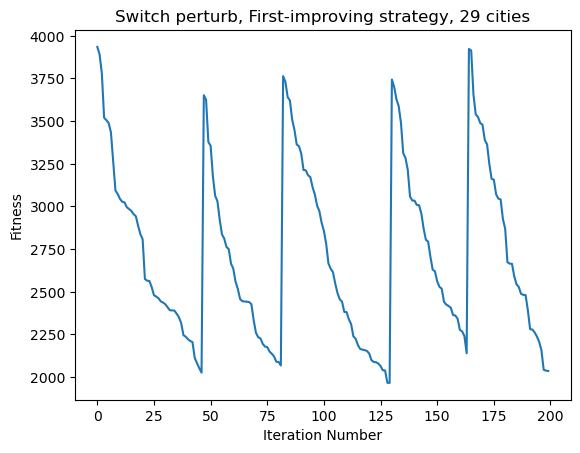

In [8]:
fitness = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness,
    "Iteration Number",
    "Fitness",
    f"Switch perturb, First-improving strategy, {n} cities",
)

In [12]:
tries = [iteration["local_evals"] for iteration in history]
utils.simple_graph(
    tries,
    "Iteration Number",
    "Evaluations before next step",
    f"Tries: {name_perturb}, {name_ls}",
)

KeyError: 'local_evals'

### ls - try all permutations, select best for the next step

In [8]:
# parallel versions compute all possible permutations in every step

perturbation = parallel_switch
#           parallel_move
#           parallel_switch
#           parallel_invert

ls = ls_best_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)
#           random_init_wrapper(size=n)

max_steps = 200
# inits
fitness = fitness_wrapper(distance_matrix)

In [9]:
# do the search here!
results = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=max_steps,
)

# separate and print results!
best_fitness = results["best_fitness"]
best_order = results["best_order"]
history = results["history"]
utils.print_results(results)

Best solution found:
[20  4 28  1  9  3 14 17 19  2 25  8 11  5 27  7 22  6 24 15 26 12 13 16
 21 10 18 23  0]
With fitness:  2097.0
Total steps taken:  200


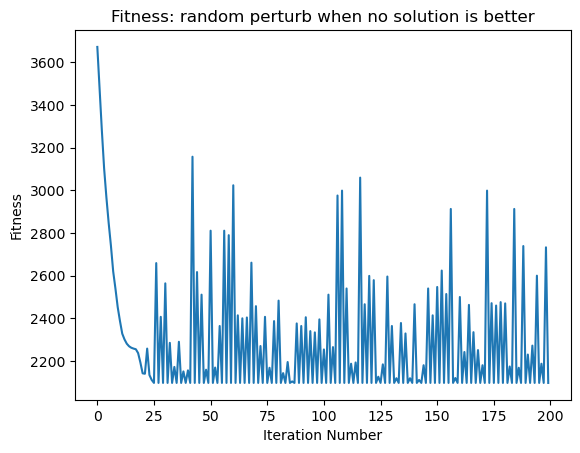

restarted:  88


In [10]:
fitness_list = [iteration["fitness"] for iteration in history]
utils.simple_graph(
    fitness_list,
    "Iteration Number",
    "Fitness",
    f"Fitness: random perturb when no solution is better",
)
restarts = [iteration["restart here"] for iteration in history]
num_restarts = sum(restarts)
print("restarted: ", num_restarts)